**HARDIK KHARIWAL**

**22B3954**

EE353 - Assignment 4

video link: https://drive.google.com/drive/folders/1e1SjJwNGk7dD_5X-0jX7eg3WQjjfHPyr?usp=sharing

### (1) DATA PREPROCESSING

(a)Visualization and pre-processing of data

Dataset Head:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0

<ipython-input-4-f4719a2a1799>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)
<ipython-input-4-f4719a2a1799>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

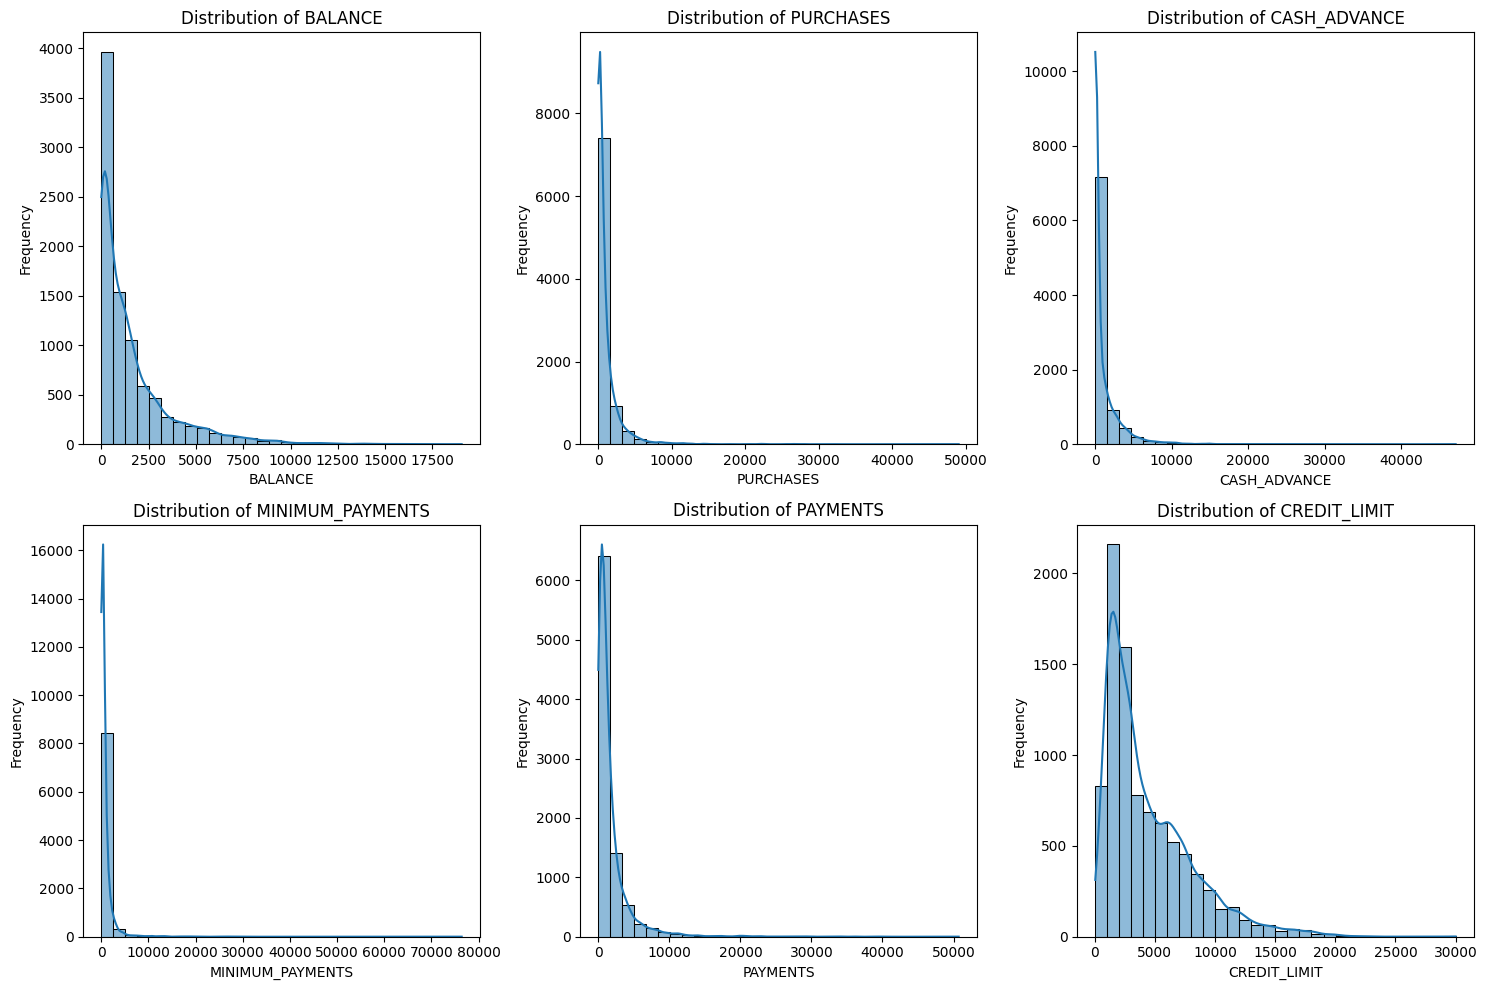

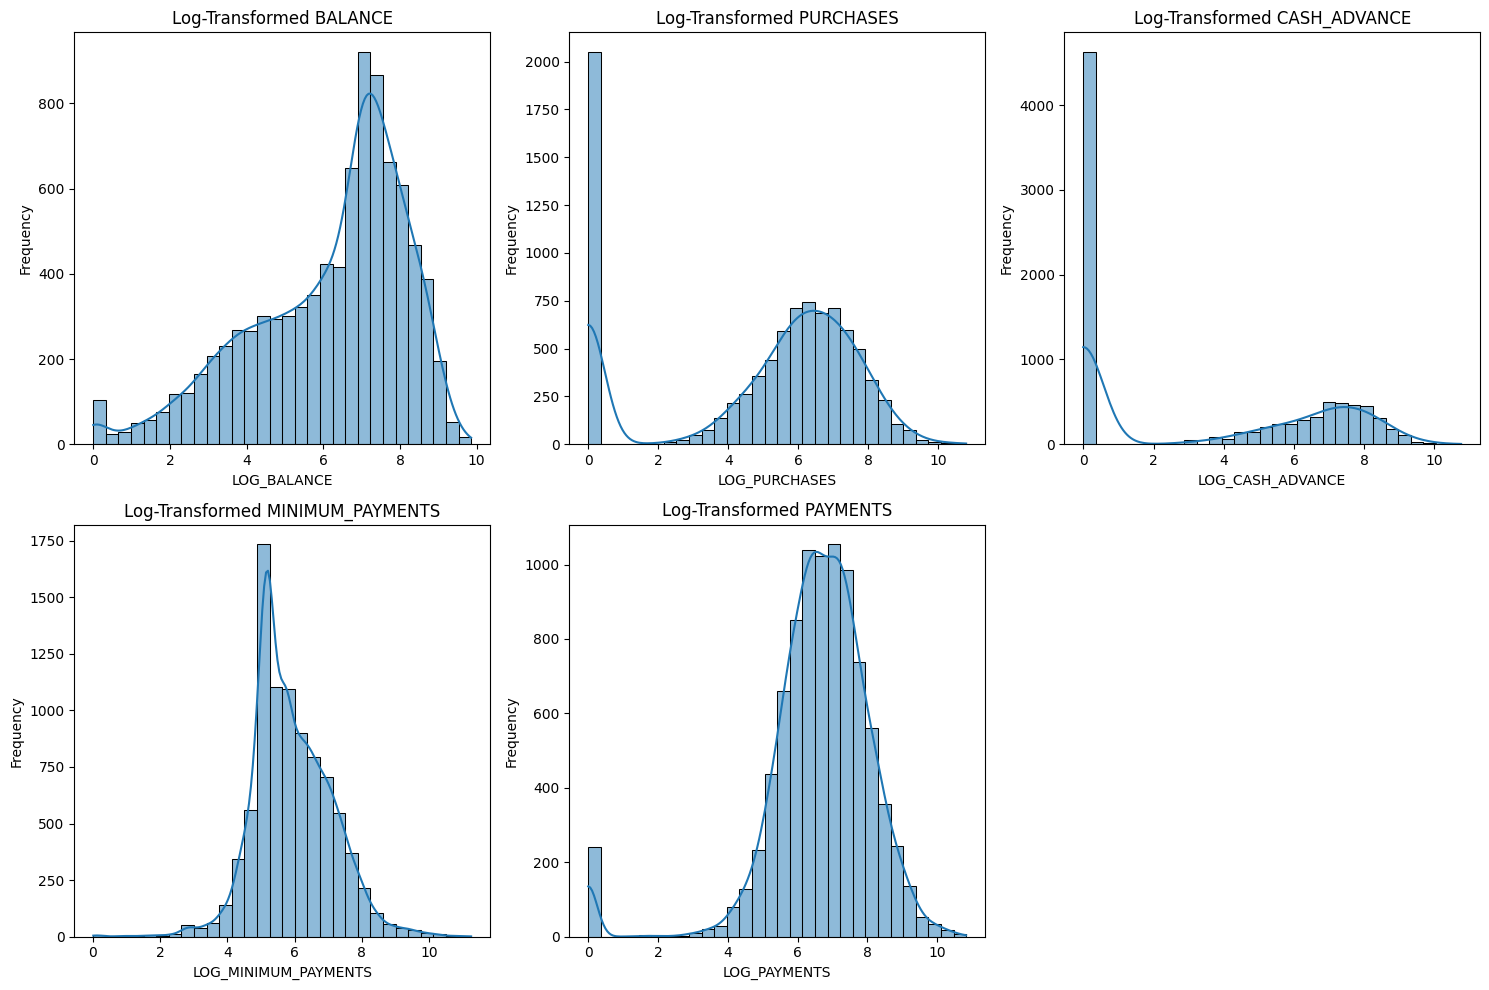


Pre-processed data saved to: /content/Processed-Customer-Data.csv


In [ ]:
# Importing essential libraries for working with data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the dataset
csv_path = '/content/Customer-Data - 2.csv'
# Load data into a DataFrame
df = pd.read_csv(csv_path)

# --- Step 1: Understanding the Dataset ---
# Displaying an overview of the dataset
print("Preview of the Dataset:")
print(df.head())  # Show the first few rows

# Getting detailed information about the dataset structure
print("\nDataset Overview:")
df.info()

# Statistical summary of numerical columns
print("\nSummary of Numerical Features:")
print(df.describe())

# --- Step 2: Handling Missing Data ---
# Identify columns with missing values
missing_values = df.isnull().sum()
print("\nMissing Data per Column:")
print(missing_values[missing_values > 0])

# Fill missing values in 'CREDIT_LIMIT' with the median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

# Fill missing values in 'MINIMUM_PAYMENTS' with the median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

# Verify no missing values remain
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# --- Step 3: Data Visualization ---
# Columns selected for distribution analysis
features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 
            'MINIMUM_PAYMENTS', 'PAYMENTS', 'CREDIT_LIMIT']

# Plot distributions for selected features
plt.figure(figsize=(14, 8))
for idx, feature in enumerate(features, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# --- Step 4: Skewness Adjustment ---
# Columns to normalize using log transformation
log_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 
                'MINIMUM_PAYMENTS', 'PAYMENTS']

# Apply log transformation to reduce skewness
for feature in log_features:
    df[f'LOG_{feature}'] = np.log1p(df[feature])  # Add 1 to avoid log(0)

# Check the log-transformed distributions
plt.figure(figsize=(14, 8))
for idx, feature in enumerate(log_features, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(df[f'LOG_{feature}'], kde=True, bins=30, color='green')
    plt.title(f'Log-Scaled: {feature}')
    plt.xlabel(f'LOG_{feature}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# --- Step 5: Save the Processed Data ---
# Save the modified DataFrame to a new file
output_path = '/content/Processed-Customer-Data.csv'
df.to_csv(output_path, index=False)
print(f"\nProcessed data saved successfully at: {output_path}")

In [5]:
# --- Step 5: Retain the Pre-processed Data ---
# Keep the preprocessed data in a DataFrame
processed_data = data

# Display the first few rows of the processed data
print("Processed Data (First 5 Rows):")
print(processed_data.head())


Processed Data (First 5 Rows):
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ..

(1)(b) find and remove highly correlated variables

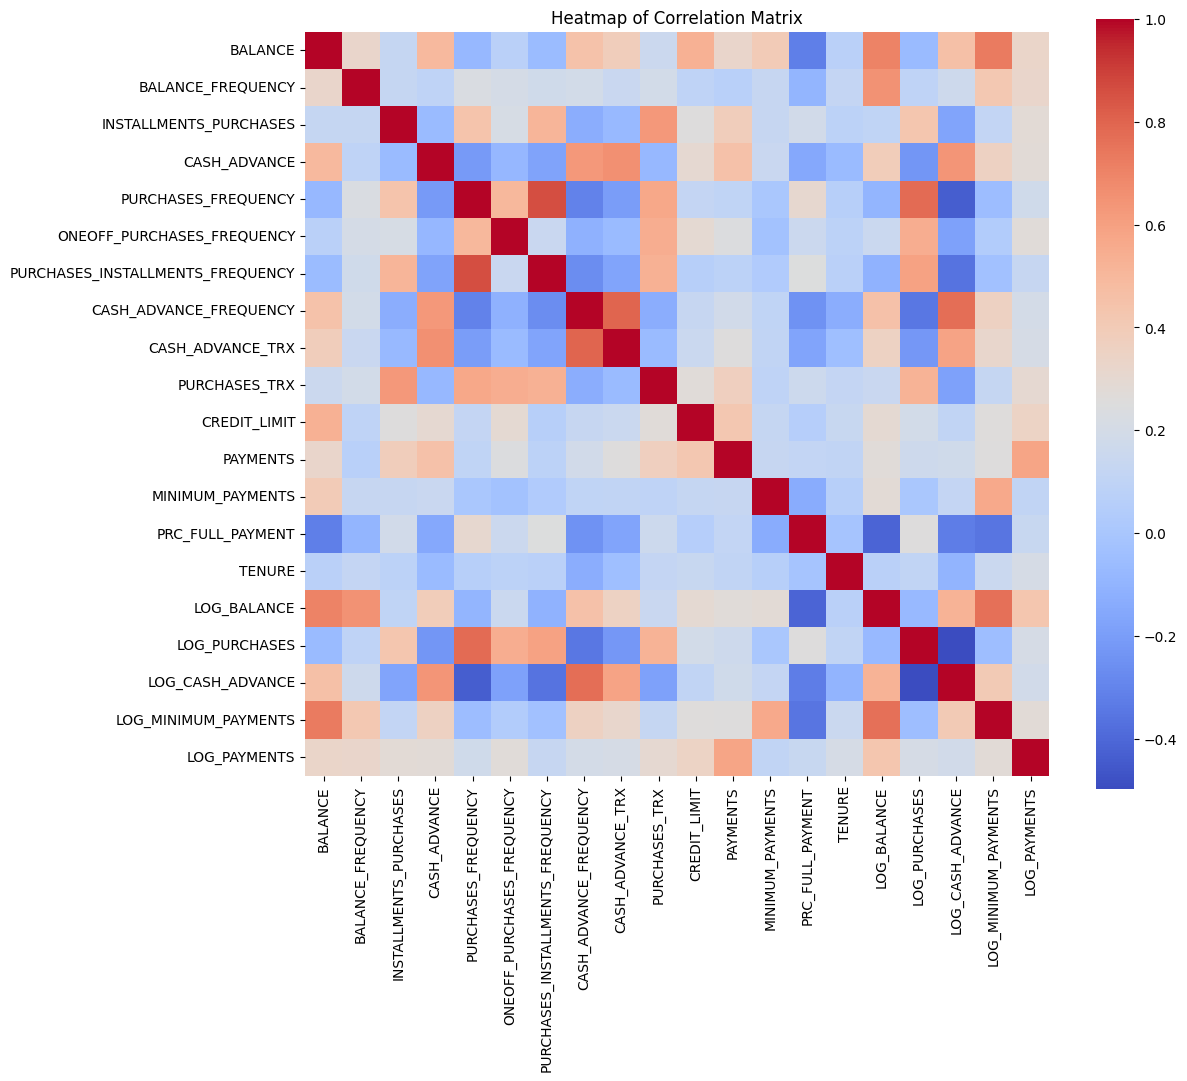

Highly Correlated Variable Pairs (Correlation > 0.9):

Non-Numeric Columns:
Index([], dtype='object')

Final Dataframe Shape: (8950, 20)
Columns in the Final Dataframe:
Index(['BALANCE', 'BALANCE_FREQUENCY', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'LOG_BALANCE',
       'LOG_PURCHASES', 'LOG_CASH_ADVANCE', 'LOG_MINIMUM_PAYMENTS',
       'LOG_PAYMENTS'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Remove Irrelevant Columns ---
# If the 'CUST_ID' column exists, it is removed since it's not useful for analysis
if 'CUST_ID' in cleaned_data.columns:  # Verify the column's presence
    cleaned_data = cleaned_data.drop('CUST_ID', axis=1)  # Drop the 'CUST_ID' column

# --- Step 2: Analyze Correlations ---
# Generate a correlation matrix to evaluate relationships between numerical features
correlation_matrix = cleaned_data.corr()  # Compute pairwise correlations

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Set the heatmap size for clarity
sns.heatmap(
    correlation_matrix,  # Use the correlation data
    annot=False,  # Disable annotations for a cleaner view
    cmap='coolwarm',  # Use a color scheme for highlighting correlations
    fmt='.2f',  # Display values with two decimal precision
    square=True  # Keep cells square-shaped
)
plt.title('Correlation Heatmap')  # Add a title for context
plt.show()  # Display the heatmap

# --- Step 3: Handle Highly Correlated Features ---
# Set a threshold to flag highly correlated features
threshold = 0.9  # Correlation above this is considered too high

# Find pairs of columns with correlation above the threshold
redundant_pairs = [
    (feature1, feature2)  # Tuple of column names
    for feature1 in correlation_matrix.columns
    for feature2 in correlation_matrix.columns
    if feature1 != feature2 and correlation_matrix.loc[feature1, feature2] > threshold  # Exclude self-correlation
]

# Print the pairs of columns with high correlations
print("Features with High Correlations (> 0.9):")
for feature_pair in redundant_pairs:
    print(f"{feature_pair[0]} and {feature_pair[1]}: {correlation_matrix.loc[feature_pair[0], feature_pair[1]]}")

# Drop one feature from each correlated pair to avoid redundancy
features_to_remove = set(pair[1] for pair in redundant_pairs)  # Select the second feature in each pair
cleaned_data = cleaned_data.drop(columns=features_to_remove, axis=1)  # Remove the redundant columns

# --- Step 4: Encode Categorical Features ---
# Identify columns with non-numeric data types
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns  # Filter non-numeric columns
print("\nCategorical Features Detected:")
print(categorical_columns)

# Apply One-Hot Encoding to categorical variables, if any
if len(categorical_columns) > 0:
    cleaned_data = pd.get_dummies(
        cleaned_data, columns=categorical_columns, drop_first=True  # Avoid over-representation with one less dummy variable
    )

# --- Step 5: Dataset Overview ---
# Display the final dimensions of the dataset
print("\nFinal Dataset Dimensions:", cleaned_data.shape)

# List all columns remaining in the dataset
print("Features in the Final Dataset:")
print(cleaned_data.columns)

### (2) CLUSTERING

(a) K Means Clustering, i take k=4

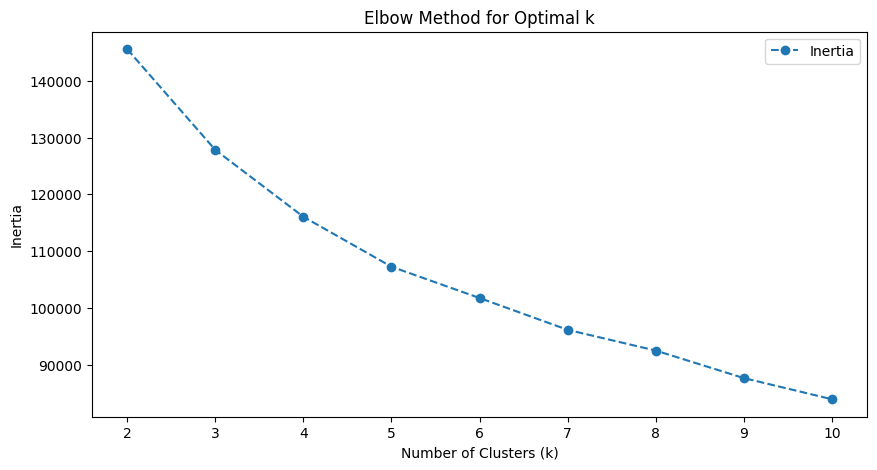

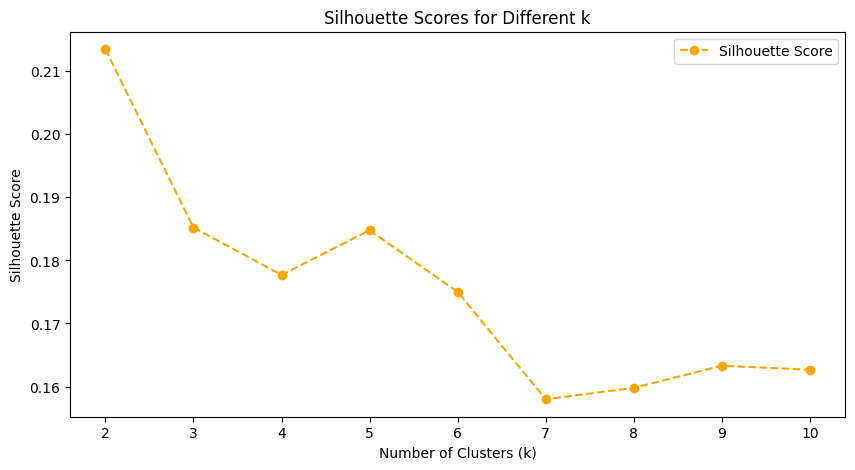

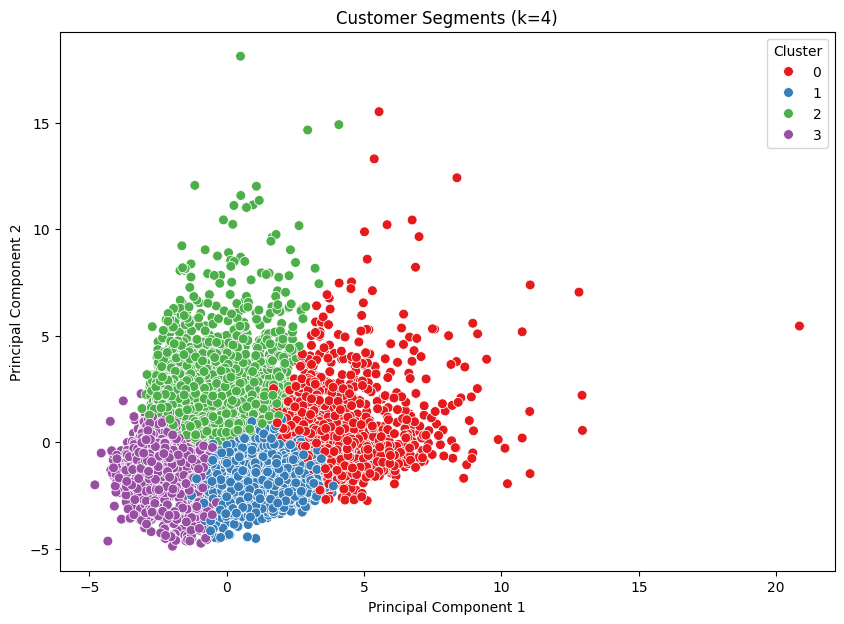

Cluster Sizes:
Cluster
1    2879
2    2657
3    2414
0    1000
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans  # For clustering operations
from sklearn.preprocessing import StandardScaler  # To standardize numerical features
from sklearn.metrics import silhouette_score  # To evaluate clustering quality
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced plotting
import numpy as np  # For numerical computations

# --- Step 1: Prepare Data for Clustering ---
# Normalize numerical columns to ensure uniform contribution across features
normalizer = StandardScaler()  # Instantiate the scaler for standardization
normalized_data = normalizer.fit_transform(cleaned_data)  # Transform data to zero mean and unit variance

# --- Step 2: Find the Optimal Number of Clusters ---
# Evaluate clustering performance using the Elbow Method and Silhouette Analysis
wcss = []  # To store the within-cluster sum of squares for each value of k
sil_scores = []  # To store silhouette scores for each value of k
cluster_range = range(2, 11)  # Test k values from 2 to 10

# Loop through potential values of k to analyze performance
for clusters in cluster_range:
    model = KMeans(n_clusters=clusters, random_state=42)  # Initialize K-Means with specific k
    model.fit(normalized_data)  # Fit the model to normalized data
    wcss.append(model.inertia_)  # Collect within-cluster sum of squares
    sil_scores.append(silhouette_score(normalized_data, model.labels_))  # Compute silhouette score

# --- Elbow Method Visualization ---
# Plot WCSS values to find the optimal "elbow" point
plt.figure(figsize=(10, 5))  # Set the size of the figure
plt.plot(cluster_range, wcss, marker='o', linestyle='--', label='WCSS')  # Plot WCSS for each k
plt.title('Elbow Method for Selecting k')  # Add title
plt.xlabel('Number of Clusters (k)')  # Label x-axis
plt.ylabel('WCSS')  # Label y-axis
plt.legend()  # Add a legend
plt.show()  # Display the plot

# --- Silhouette Score Visualization ---
# Plot silhouette scores to assess clustering quality
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(cluster_range, sil_scores, marker='o', linestyle='--', color='orange', label='Silhouette Score')  # Plot scores
plt.title('Silhouette Scores for Different k')  # Add title
plt.xlabel('Number of Clusters (k)')  # Label x-axis
plt.ylabel('Silhouette Score')  # Label y-axis
plt.legend()  # Add a legend
plt.show()  # Show the plot

# --- Step 3: Apply K-Means with Optimal Clusters ---
# Based on evaluation, select the optimal number of clusters
best_k = 4  # Replace with the selected k from analysis

# Train a final K-Means model with the chosen number of clusters
final_model = KMeans(n_clusters=best_k, random_state=42)  # Initialize the model
final_model.fit(normalized_data)  # Fit the model to normalized data

# Add cluster labels to the original dataset
cleaned_data['Cluster_Group'] = final_model.labels_  # Assign cluster labels as a new column

# --- Step 4: Cluster Visualization in 2D Space ---
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction

# Reduce data to two principal components for 2D visualization
pca_transformer = PCA(n_components=2)  # Set PCA to output two components
pca_data = pca_transformer.fit_transform(normalized_data)  # Transform the normalized data

# Visualize clusters in a 2D scatter plot
plt.figure(figsize=(10, 7))  # Set plot size
sns.scatterplot(
    x=pca_data[:, 0],  # Principal Component 1 on x-axis
    y=pca_data[:, 1],  # Principal Component 2 on y-axis
    hue=cleaned_data['Cluster_Group'],  # Color points by cluster group
    palette='Set2',  # Use 'Set2' color palette for distinction
    s=60  # Adjust marker size
)
plt.title(f'Cluster Visualization (k={best_k})')  # Title indicating the number of clusters
plt.xlabel('PCA Component 1')  # Label x-axis
plt.ylabel('PCA Component 2')  # Label y-axis
plt.legend(title='Clusters')  # Add legend with title
plt.show()  # Render the plot

# --- Step 5: Cluster Summary ---
# Display the size of each cluster
print("Cluster Distribution:")
print(cleaned_data['Cluster_Group'].value_counts())  # Count samples in each cluster


### (2) CLUSTERING

(b) DBSCAN 

I tried this algorithm for wide range of values of MinPoints and radius value(e) but no pair could cluster them as k means 

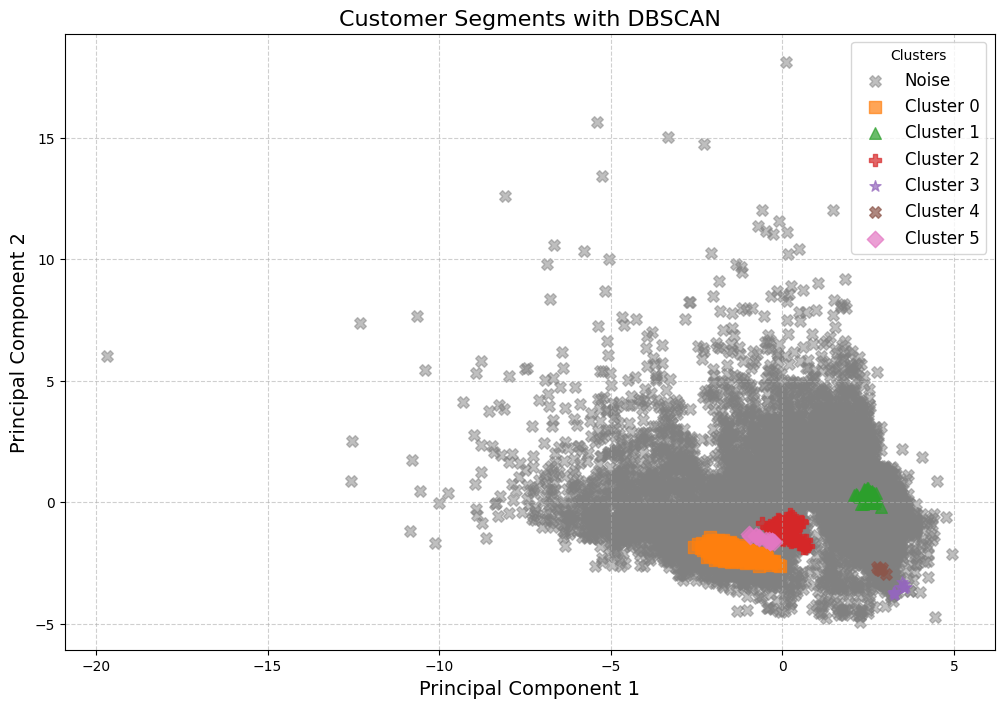

Number of Noise Points (outliers): 8089
Number of Clusters Found: 28


In [ ]:
from sklearn.cluster import DBSCAN  # For density-based clustering
from sklearn.preprocessing import StandardScaler  # For standardizing data
from sklearn.decomposition import PCA  # For dimensionality reduction
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced visualizations
import numpy as np  # For numerical operations

# --- Step 1: Preprocess Data for Clustering ---
# Normalize numerical data to ensure equal contribution of all features
scaler = StandardScaler()  # Initialize scaler
scaled_data = scaler.fit_transform(processed_data)  # Transform the data

# --- Step 2: Apply DBSCAN ---
# Configure DBSCAN parameters for clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(scaled_data)  # Fit the model and predict cluster labels

# Assign cluster labels back to the dataset
processed_data['Cluster'] = dbscan_labels  # Add cluster labels as a new column

# --- Step 3: Visualize Clusters in 2D Space ---
# Reduce data dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)  # Initialize PCA
reduced_data = pca.fit_transform(scaled_data)  # Apply PCA to scaled data

# Plot clusters with unique colors and markers
unique_clusters = np.unique(dbscan_labels)  # Identify unique cluster labels
markers = ['o', 's', '^', 'P', '*', 'X', 'D']  # A variety of markers for up to 7 clusters
colors = sns.color_palette('tab10', len(unique_clusters))  # Distinct colors for each cluster

plt.figure(figsize=(12, 8))  # Define plot size
for cluster, color, marker in zip(unique_clusters, colors, markers * len(unique_clusters)):
    if cluster == -1:  # Handle noise points separately
        plt.scatter(
            reduced_data[dbscan_labels == cluster][:, 0],  # PCA Component 1
            reduced_data[dbscan_labels == cluster][:, 1],  # PCA Component 2
            color='gray',  # Gray color for noise
            marker='X',  # Distinct marker for noise
            label='Noise',  # Label for noise points
            s=70,  # Marker size
            alpha=0.5  # Transparency
        )
    else:
        plt.scatter(
            reduced_data[dbscan_labels == cluster][:, 0],
            reduced_data[dbscan_labels == cluster][:, 1],
            color=color,
            marker=marker,
            label=f'Cluster {cluster}',  # Label for each cluster
            s=70,
            alpha=0.7
        )

# Customize plot aesthetics
plt.title('Customer Segments with DBSCAN', fontsize=16)  # Plot title
plt.xlabel('Principal Component 1', fontsize=14)  # X-axis label
plt.ylabel('Principal Component 2', fontsize=14)  # Y-axis label
plt.legend(title='Clusters', fontsize=12)  # Add legend with title
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for readability
plt.show()  # Render the plot

# --- Final Step: Summary of Clustering ---
# Report the number of noise points and detected clusters
num_noise_points = np.sum(dbscan_labels == -1)  # Count points labeled as noise (-1)
num_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Exclude noise cluster from count

print("Number of Noise Points (Outliers):", num_noise_points)  # Display noise points
print("Number of Clusters Found:", num_clusters)  # Display detected clusters


### (2) CLUSTERING 

(c) Visualize t-sne embeddings

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


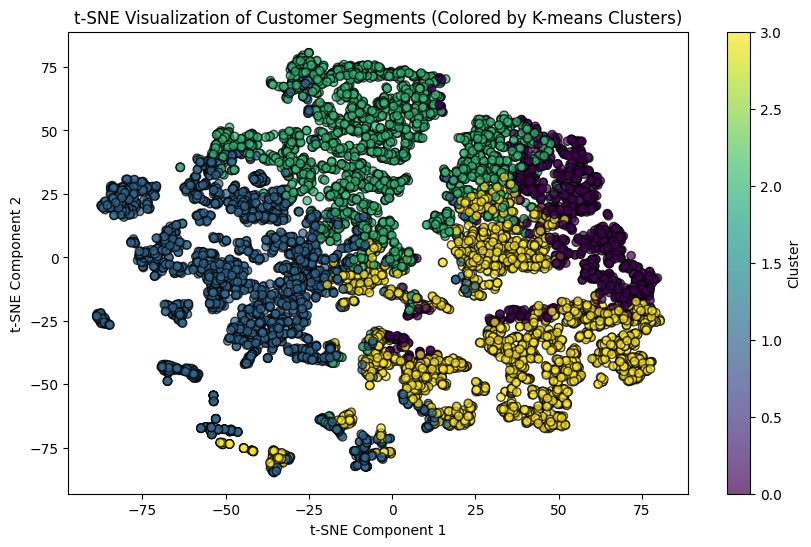

In [ ]:
from sklearn.manifold import TSNE  # For dimensionality reduction
import matplotlib.pyplot as plt  # For plotting
from sklearn.preprocessing import StandardScaler  # For data normalization
from sklearn.cluster import KMeans  # For clustering

# --- Step 1: Standardize Data ---
scaled_data = StandardScaler().fit_transform(processed_data)  # Scale data for consistency

# --- Step 2: Apply t-SNE ---
tsne = TSNE(
    n_components=2,  # Reduce to 2 dimensions
    perplexity=30,  # Adjust for dataset size (typically 5-50)
    n_iter=1000,  # Number of optimization steps
    init='pca',  # PCA initialization for faster convergence
    random_state=42  # For reproducibility
)
tsne_results = tsne.fit_transform(scaled_data)  # Transform the data

# --- Step 3: K-means Clustering ---
n_clusters = 4  # Set the number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Initialize K-means
kmeans_labels = kmeans.fit_predict(scaled_data)  # Fit and predict cluster labels

# --- Step 4: Visualize t-SNE Results ---
plt.figure(figsize=(10, 6))  # Set plot size
scatter = plt.scatter(
    tsne_results[:, 0],  # t-SNE Component 1
    tsne_results[:, 1],  # t-SNE Component 2
    c=kmeans_labels,  # Color by K-means cluster labels
    cmap='viridis',  # Color map for clusters
    marker='o',  # Circle markers
    edgecolor='black',  # Black edges for better contrast
    alpha=0.7  # Slight transparency for overlapping points
)
plt.colorbar(scatter, label='Cluster')  # Add a color bar for cluster labels
plt.title('t-SNE Visualization of Customer Segments (K-means Clusters)', fontsize=16)  # Title
plt.xlabel('t-SNE Component 1', fontsize=14)  # X-axis label
plt.ylabel('t-SNE Component 2', fontsize=14)  # Y-axis label
plt.grid(True, linestyle='--', alpha=0.6)  # Add gridlines for clarity
plt.show()  # Display the plot


### (2) CLUSTERING

(d) giving each cluster a name

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'processed_data' is the pre-processed dataframe with relevant features
# Exclude 'Cluster' column if it exists
X = processed_data.drop(columns='Cluster', errors='ignore')

# Standardize the data
scaled_data = StandardScaler().fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Add the labels back to the original dataframe
processed_data['Cluster'] = kmeans_labels

# Now, let's analyze the cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for centroids and make sure it has the same columns as X (excluding 'Cluster')
centroids_df = pd.DataFrame(centroids, columns=X.columns)

# Print out centroids to inspect
print(centroids_df)

# Define cluster names based on centroid analysis and business logic
cluster_names = {
    0: "High Spenders",
    1: "Low Spenders",
    2: "Reckless Spenders",
    3: "Cautious Buyers"
}

# Assign names based on the cluster labels
processed_data['Cluster_Name'] = processed_data['Cluster'].map(cluster_names)

# Check the first few rows to see the assigned cluster names
print(processed_data.head())


    BALANCE  BALANCE_FREQUENCY  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0  1.735115           0.399474               -0.100403      1.784630   
1 -0.660325          -0.706795               -0.150702     -0.454229   
2  0.028760           0.449188                0.691294     -0.345214   
3 -0.024207           0.170549               -0.417062      0.076049   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0            -0.272188                   -0.088680   
1             0.143473                   -0.350536   
2             1.012171                    0.983107   
3            -0.933970                   -0.474983   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                         -0.252910                1.631618          1.619185   
1                          0.189203               -0.634376         -0.459237   
2                          0.777288               -0.419918         -0.332466   
3                         -0.780916         

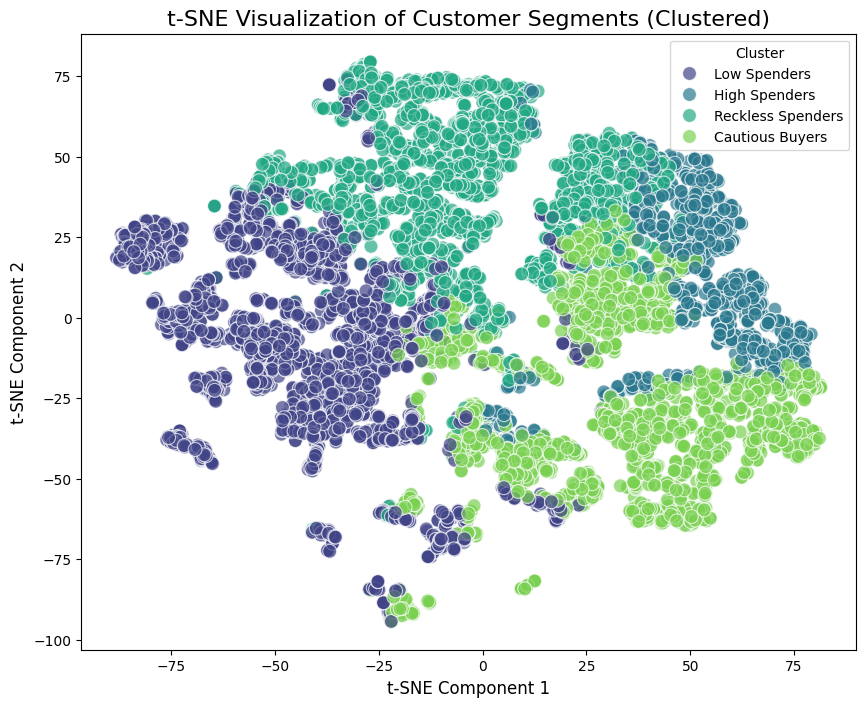

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use t-SNE to reduce dimensionality to 2D for visualization
from sklearn.manifold import TSNE

# Apply t-SNE to reduce data to 2D for plotting
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Add t-SNE results to the dataframe for plotting
processed_data['t-SNE Component 1'] = tsne_results[:, 0]
processed_data['t-SNE Component 2'] = tsne_results[:, 1]

# Plot the clusters using Seaborn
plt.figure(figsize=(10, 8))

# Plot the points, coloring by cluster name
sns.scatterplot(
    x='t-SNE Component 1', y='t-SNE Component 2',
    hue='Cluster_Name', data=processed_data, palette='viridis', s=100, alpha=0.7
)

# Add a legend
plt.legend(title='Cluster', loc='upper right')

# Add titles and labels
plt.title('t-SNE Visualization of Customer Segments (Clustered)', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# Display the plot
plt.show()


### (3) PCA

(a) Noramlizing the data

In [ ]:
# Automatically exclude non-numeric columns
numeric_columns = processed_data.select_dtypes(include=np.number).columns
excluded_columns = ['Cluster_Name', 't-SNE Component 1', 't-SNE Component 2']
numeric_columns = [col for col in numeric_columns if col not in excluded_columns]

# Standardize the numeric data
normalized_data = scaler.fit_transform(processed_data[numeric_columns])

# Convert back to DataFrame for readability
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# Verify normalization
print("Means (should be ~0):\n", normalized_df.mean(axis=0))
print("\nStandard Deviations (should be ~1):\n", normalized_df.std(axis=0))

# Preview the normalized DataFrame
print("\nNormalized DataFrame (first 5 rows):\n", normalized_df.head())


,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,...,PRC_FULL_PAYMENT,TENURE,LOG_BALANCE,LOG_PURCHASES,LOG_CASH_ADVANCE,LOG_MINIMUM_PAYMENTS,LOG_PAYMENTS,Cluster,t-SNE 1,t-SNE 2
0,-0.731989,-0.249434,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,...,-0.525551,0.36068,-1.205218,-0.113532,-0.930733,-0.829841,-0.824484,-0.746591,-0.748585,-0.341906
1,0.786961,0.134325,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,...,0.234227,0.36068,0.948918,-1.679855,1.528788,0.908184,1.065033,-1.733153,1.231610,-0.430653
2,0.447135,0.518084,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,...,-0.525551,0.36068,0.824993,0.600727,-0.930733,0.450407,-0.119300,0.239972,0.128077,0.989620
3,0.049099,-1.016953,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,...,-0.525551,0.36068,0.624653,0.827499,0.564372,-0.144271,-4.161996,1.226534,-0.545652,-1.362490
4,-0.358775,0.518084,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,...,-0.525551,0.36068,0.271260,-0.708481,-0.930733,-0.351833,-0.064979,1.226534,-0.935831,-1.849768


### (3) PCA

(b) plot the variance explained vs the pca dimensions

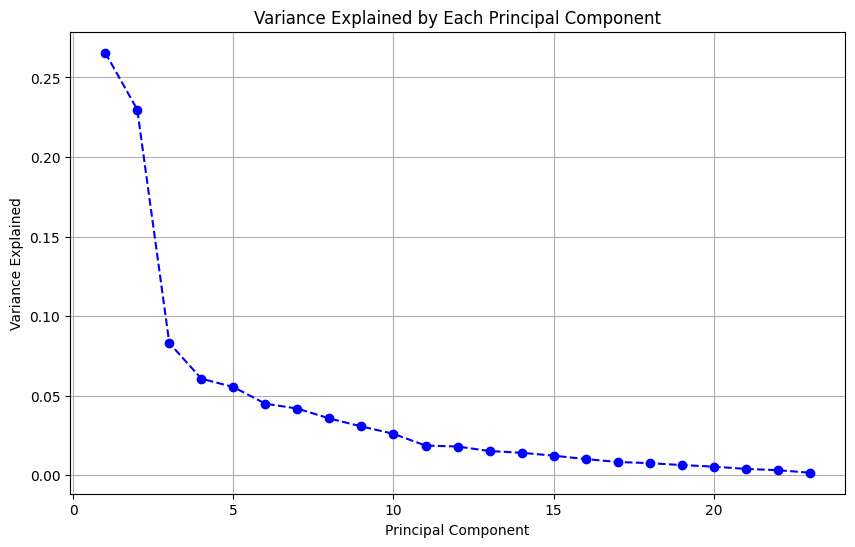

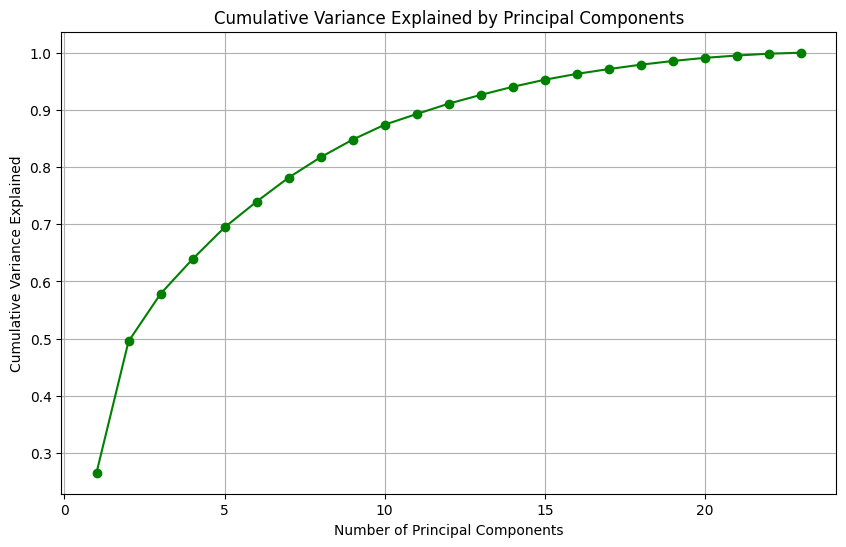

In [ ]:
# Train PCA on the normalized data
pca = PCA()
pca.fit(normalized_df)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plot variance explained by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='blue')
plt.title('Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Plot cumulative variance explained
threshold = 0.90  # Desired variance threshold
components_required = np.argmax(cumulative_variance >= threshold) + 1  # Number of components for threshold

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='green', label='Cumulative Variance')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'{threshold*100}% Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

# Print the result
print(f"Number of components required for {threshold*100}% cumulative variance: {components_required}")


### (3) PCA

(c) Reconstructing data and calculating MSE

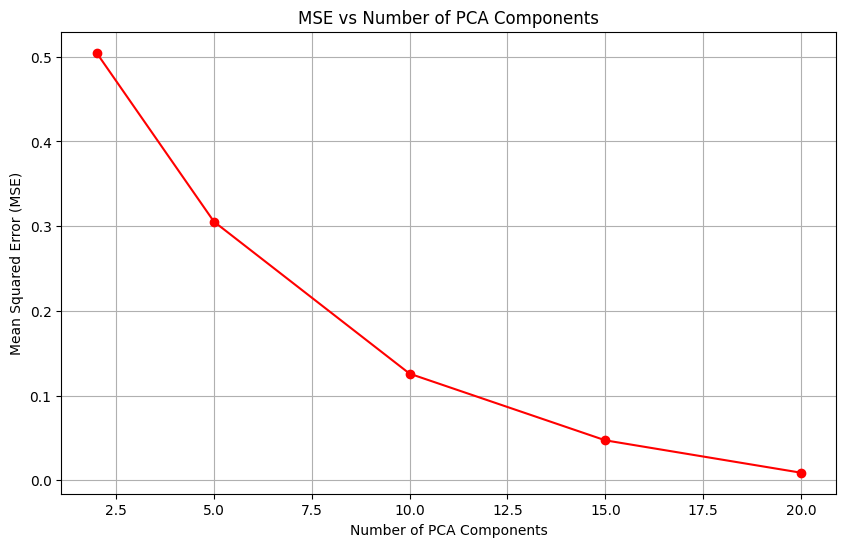

MSE with 2 components: 0.5047483130739032
MSE with 5 components: 0.3053785128333493
MSE with 10 components: 0.12585925397875722
MSE with 15 components: 0.047182676603927616
MSE with 20 components: 0.008950321703517452


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to reconstruct data and compute MSE
def reconstruct_and_compute_mse(n_components):
    # Apply PCA with n_components
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(normalized_df)  # Project data to lower-dimensional space

    # Reconstruct the data from the reduced data
    reconstructed_data = pca.inverse_transform(reduced_data)

    # Compute the MSE between original and reconstructed data
    mse = mean_squared_error(normalized_df, reconstructed_data)

    return mse

# Try with different numbers of components
components = list(range(2, 21, 2))  # Test components from 2 to 20 in steps of 2
mse_values = [reconstruct_and_compute_mse(n) for n in components]

# Plot MSE vs Number of Components
plt.figure(figsize=(10, 6))
plt.plot(components, mse_values, marker='o', linestyle='-', color='red')
plt.title('MSE vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# Print the MSE values
for n, mse in zip(components, mse_values):
    print(f'MSE with {n} components: {mse}')

# Select optimal components based on a threshold
mse_threshold = 0.01
optimal_components = next((n for n, mse in zip(components, mse_values) if mse <= mse_threshold), None)
if optimal_components:
    print(f'Optimal number of components for MSE <= {mse_threshold}: {optimal_components}')
else:
    print(f'No number of components achieved MSE <= {mse_threshold}')
